In [181]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, BatchNormalization, Dropout, LSTM, Embedding, GlobalMaxPool1D, Reshape
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
df = pd.read_csv('tcc_ceds_music.csv')

In [4]:
df.head()

Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadness  feelings  danceability  loudness  acousticness  \
0    0.000598  ...  0.380299  0.117175      0.357739  0.454119      0.997992   
1    0.443435  ...  0.001284  0.001284      0.331745  0.647540      0.954819   
2    0.002770  ...  0.002770  0.225422      0.456298  0.585288      0.840361   
3    0.001548  ...  0.225889  0.001548      0.686992  0.744404      0.083935   
4    0.417772  ...  0.068800  0.001350      0.291671  0.646489      0.975904   

   instrumentalness   valence    energy       topic  age  
0          0.901822  0.339448  0.137110     sadness  1.0  
1          0.000002  0.325021  0.263240  world/life  1.0  
2          0.000000  0.351814  0.139112       music  1.0  
3          0.199393  0.775350  0.743736    romantic  1.0  
4          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 31 columns]

In [5]:
df.shape

(28372, 31)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

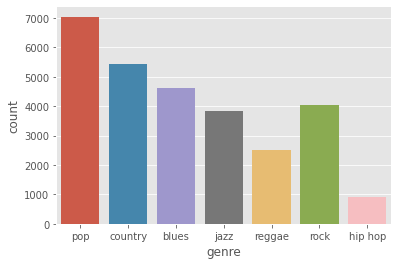

In [6]:
sns.countplot('genre',data=df)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

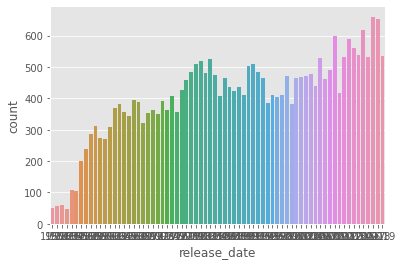

In [7]:
sns.countplot('release_date',data=df)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

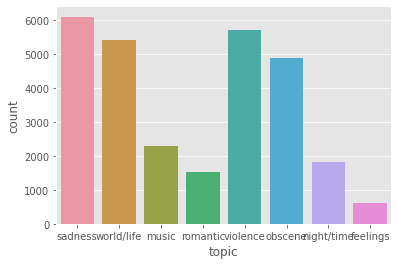

In [8]:
sns.countplot('topic',data=df)

In [9]:
# clean = []
# stop_words = stopwords.words('english')
# stop_words.append('chorus')
# stop_words.append('verse')
# lemmatizer = WordNetLemmatizer()

In [10]:
# for index, row in df.iterrows():
#     lyrics = row['lyrics']
#     lyrics = re.sub('\n', "", lyrics)
#     lyrics = re.sub('x1', "", lyrics)
#     lyrics = re.sub('x2', "", lyrics)
#     lyrics = re.sub('x3', "", lyrics)
#     lyrics = re.sub('x4', "", lyrics)
#     lyrics = re.sub('x5', "", lyrics)
#     lyrics = re.sub('x6', "", lyrics)
#     lyrics = re.sub('x7', "", lyrics)
#     lyrics = re.sub('x8', "", lyrics)
#     lyrics = re.sub('x9', "", lyrics)
#     lyrics = lyrics.lower() #lowercasing
#     lyrics = re.sub("[^a-z]+", " ", lyrics) #remove all numbers and special chars
#     lyrics = lyrics.split()
#     lyrics = [word for word in lyrics if not word in stop_words] #remove stopwords
#     lyrics = [lemmatizer.lemmatize(token) for token in lyrics] #lemmatize
#     lyrics = [lemmatizer.lemmatize(token, "v") for token in lyrics]
#     lyrics = " ".join(lyrics)
#     clean.append(lyrics)
# df['clean_lyrics'] = clean #add clean lyrics to a new column in the dataframe

In [11]:
pop = ' '.join(df[df.genre == 'pop'].lyrics.values)
country = ' '.join(df[df.genre == 'country'].lyrics.values)
blues = ' '.join(df[df.genre == 'blues'].lyrics.values)
jazz = ' '.join(df[df.genre == 'jazz'].lyrics.values)
reggae = ' '.join(df[df.genre == 'reggae'].lyrics.values)
rock = ' '.join(df[df.genre == 'rock'].lyrics.values)
hiphop = ' '.join(df[df.genre == 'hip hop'].lyrics.values)

In [12]:
sadness = ' '.join(df[df.topic == 'sadness'].lyrics.values)
worldlife = ' '.join(df[df.topic == 'world/life'].lyrics.values)
music = ' '.join(df[df.topic == 'music'].lyrics.values)
romantic = ' '.join(df[df.topic == 'romantic'].lyrics.values)
violence = ' '.join(df[df.topic == 'violence'].lyrics.values)
obscene = ' '.join(df[df.topic == 'obscene'].lyrics.values)
nighttime = ' '.join(df[df.topic == 'night/time'].lyrics.values)
feelings = ' '.join(df[df.topic == 'feelings'].lyrics.values)

Text(0.5, 1.0, 'Pop')

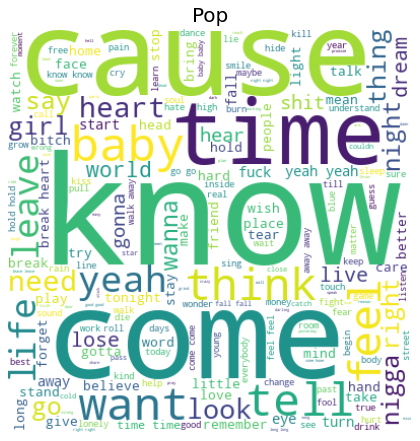

In [13]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(pop)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Pop', size=20)

Text(0.5, 1.0, 'Country')

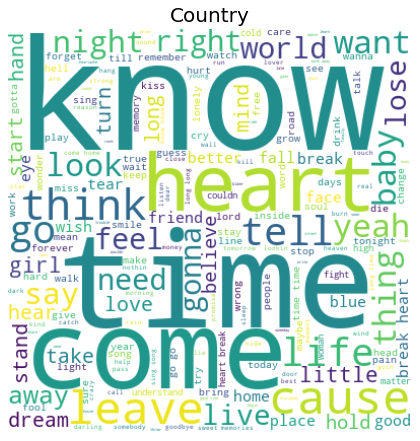

In [14]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(country)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Country', size=20)

Text(0.5, 1.0, 'Blues')

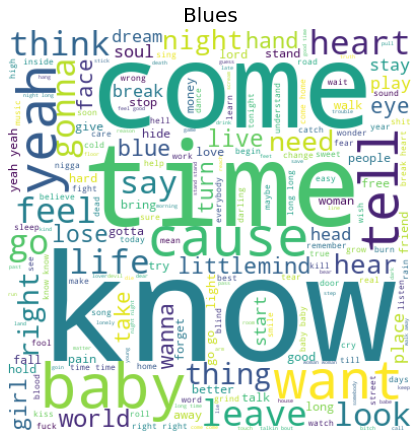

In [15]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(blues)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Blues', size=20)

Text(0.5, 1.0, 'Jazz')

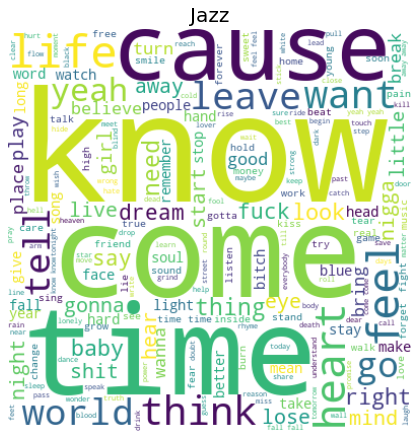

In [16]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(jazz)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Jazz', size=20)

Text(0.5, 1.0, 'Reggae')

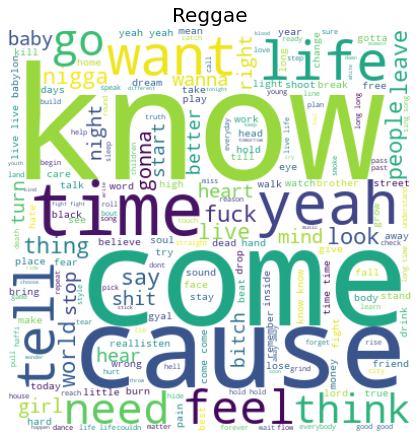

In [17]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(reggae)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Reggae', size=20)

Text(0.5, 1.0, 'Rock')

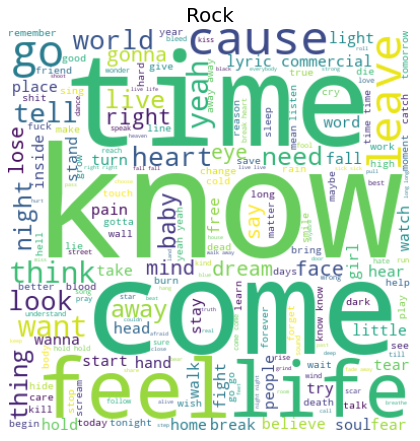

In [18]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(rock)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Rock', size=20)

Text(0.5, 1.0, 'Hip Hop')

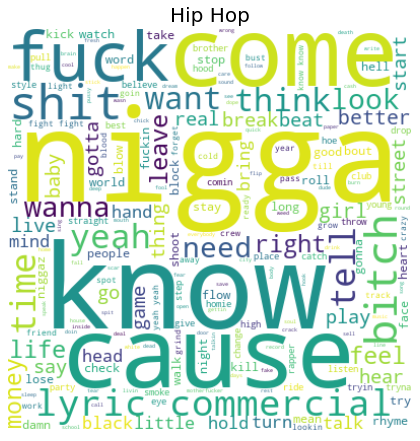

In [19]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(hiphop)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Hip Hop', size=20)

In [20]:
sadness = ' '.join(df[df.topic == 'sadness'].lyrics.values)
worldlife = ' '.join(df[df.topic == 'world/life'].lyrics.values)
music = ' '.join(df[df.topic == 'music'].lyrics.values)
romantic = ' '.join(df[df.topic == 'romantic'].lyrics.values)
violence = ' '.join(df[df.topic == 'violence'].lyrics.values)
obscene = ' '.join(df[df.topic == 'obscene'].lyrics.values)
nighttime = ' '.join(df[df.topic == 'night/time'].lyrics.values)
feelings = ' '.join(df[df.topic == 'feelings'].lyrics.values)

Text(0.5, 1.0, 'Sadness')

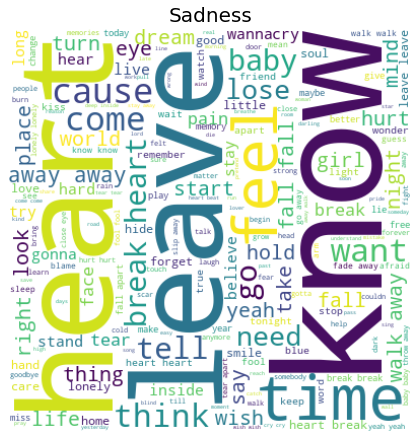

In [21]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(sadness)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Sadness', size=20)

Text(0.5, 1.0, 'World/Life')

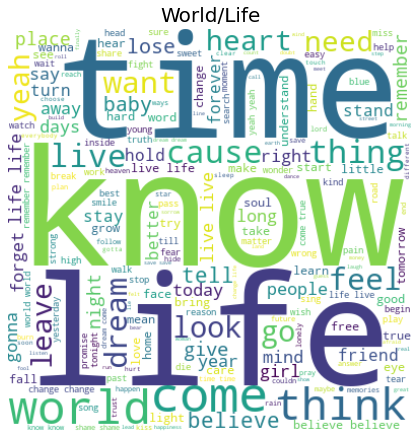

In [22]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(worldlife)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('World/Life', size=20)

Text(0.5, 1.0, 'Music')

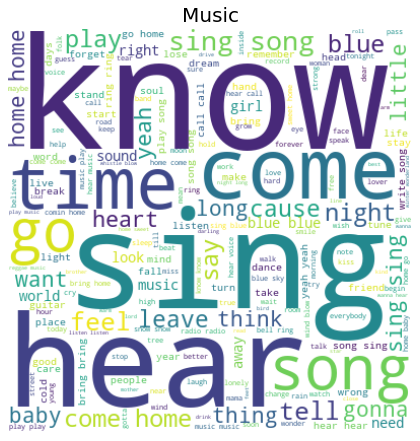

In [23]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(music)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Music', size=20)

Text(0.5, 1.0, 'Romantic')

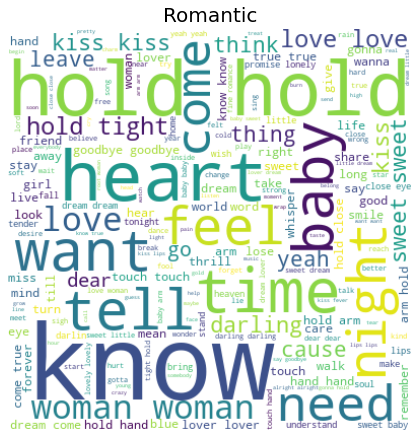

In [24]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(romantic)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Romantic', size=20)

Text(0.5, 1.0, 'Violence')

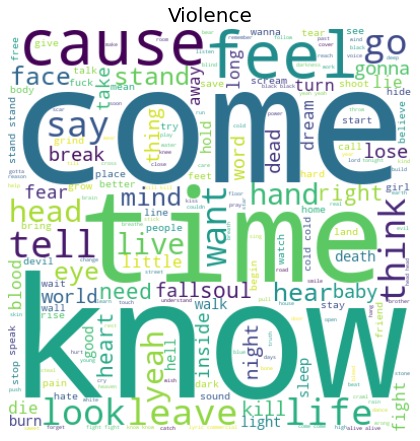

In [25]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(violence)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Violence', size=20)

Text(0.5, 1.0, 'Obscene')

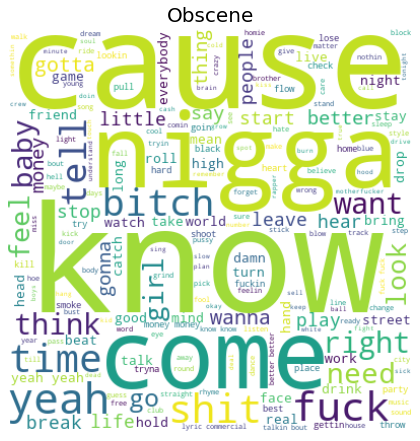

In [26]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(obscene)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Obscene', size=20)

Text(0.5, 1.0, 'Night/Time')

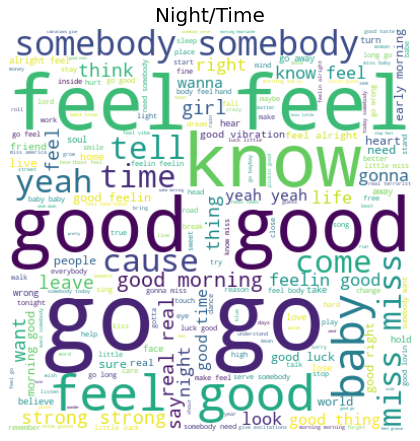

In [27]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(feelings)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Night/Time', size=20)

Text(0.5, 1.0, 'Feelings')

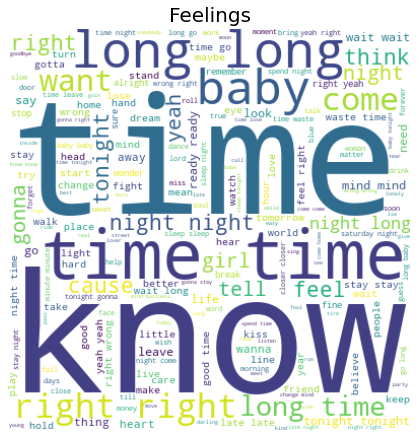

In [28]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(nighttime)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Feelings', size=20)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

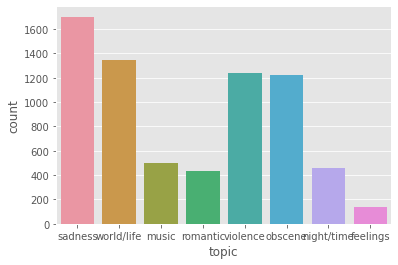

In [29]:
sns.countplot('topic',data=df[df.genre == 'pop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

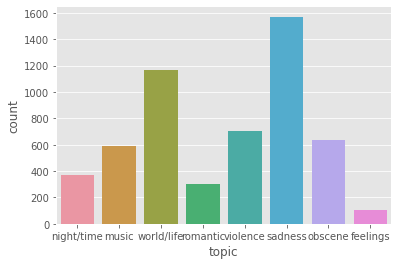

In [30]:
sns.countplot('topic',data=df[df.genre == 'country'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

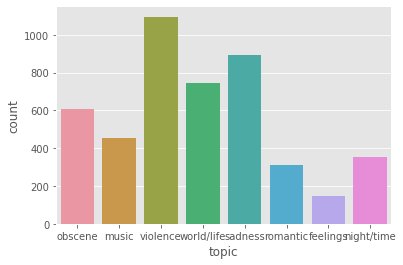

In [31]:
sns.countplot('topic',data=df[df.genre == 'blues'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

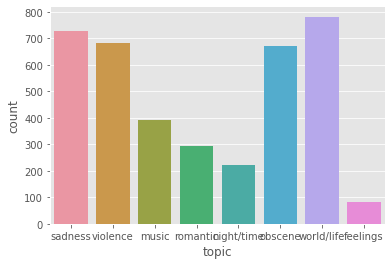

In [32]:
sns.countplot('topic',data=df[df.genre == 'jazz'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

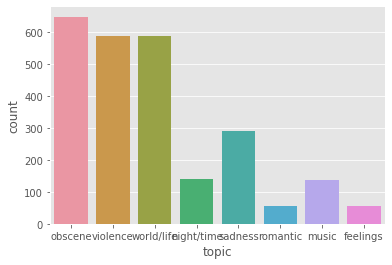

In [33]:
sns.countplot('topic',data=df[df.genre == 'reggae'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

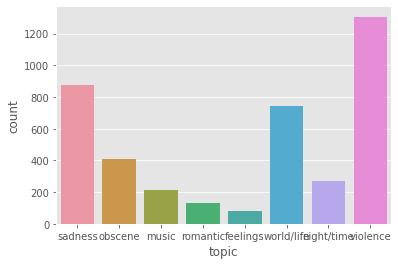

In [34]:
sns.countplot('topic',data=df[df.genre == 'rock'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

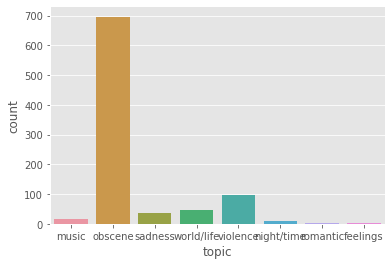

In [35]:
sns.countplot('topic',data=df[df.genre == 'hip hop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

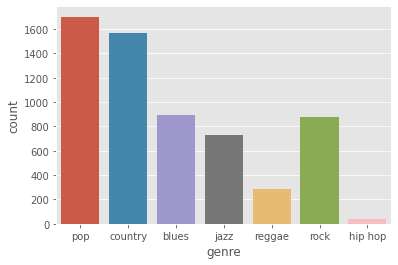

In [36]:
sns.countplot('genre',data=df[df.topic == 'sadness'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

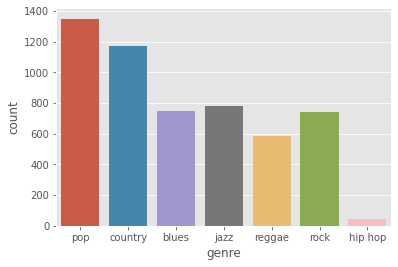

In [37]:
sns.countplot('genre',data=df[df.topic == 'world/life'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

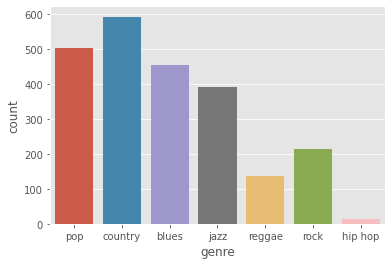

In [38]:
sns.countplot('genre',data=df[df.topic == 'music'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

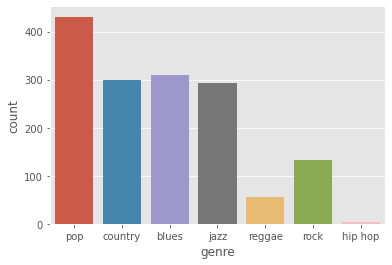

In [39]:
sns.countplot('genre',data=df[df.topic == 'romantic'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

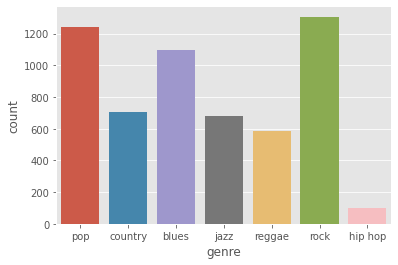

In [40]:
sns.countplot('genre',data=df[df.topic == 'violence'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

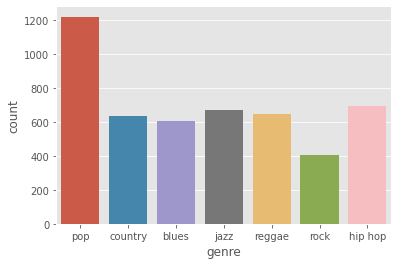

In [41]:
sns.countplot('genre',data=df[df.topic == 'obscene'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

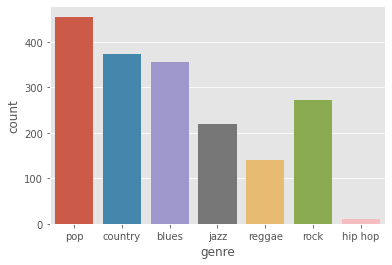

In [42]:
sns.countplot('genre',data=df[df.topic == 'night/time'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

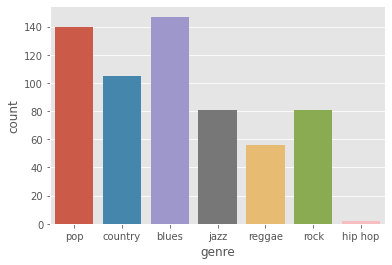

In [43]:
sns.countplot('genre',data=df[df.topic == 'feelings'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

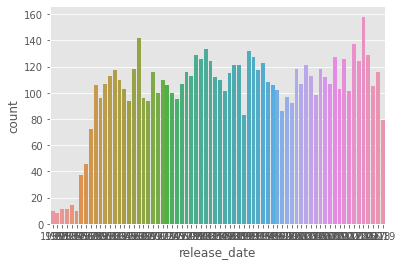

In [44]:
sns.countplot('release_date',data=df[df.genre == 'pop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

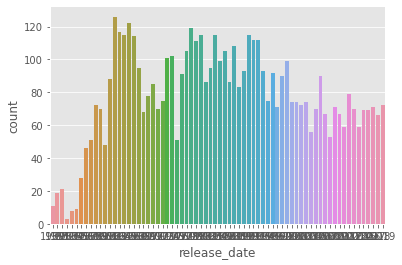

In [45]:
sns.countplot('release_date',data=df[df.genre == 'country'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

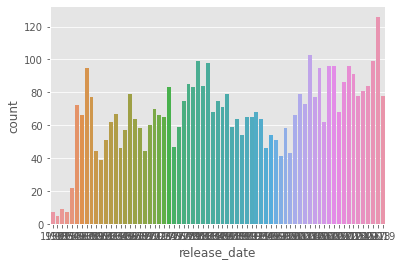

In [46]:
sns.countplot('release_date',data=df[df.genre == 'blues'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

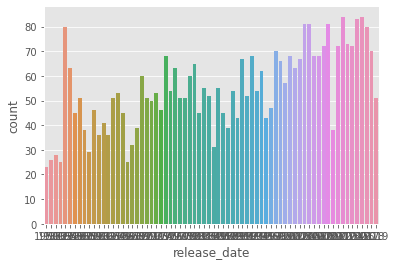

In [47]:
sns.countplot('release_date',data=df[df.genre == 'jazz'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

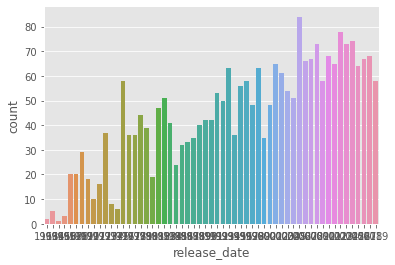

In [48]:
sns.countplot('release_date',data=df[df.genre == 'reggae'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

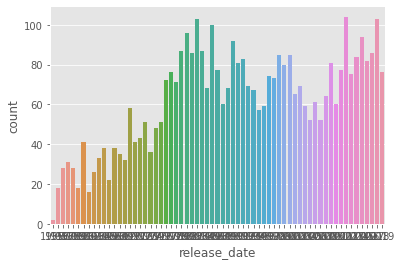

In [49]:
sns.countplot('release_date',data=df[df.genre == 'rock'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

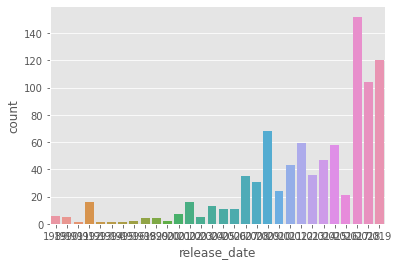

In [50]:
sns.countplot('release_date',data=df[df.genre == 'hip hop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

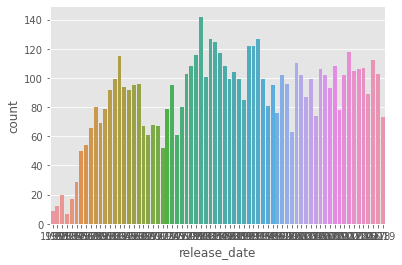

In [51]:
sns.countplot('release_date',data=df[df.topic == 'sadness'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

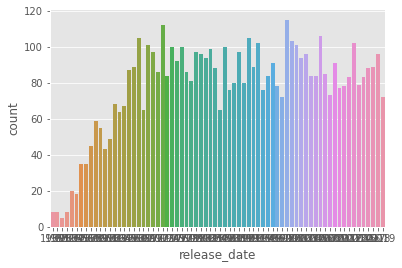

In [52]:
sns.countplot('release_date',data=df[df.topic == 'world/life'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

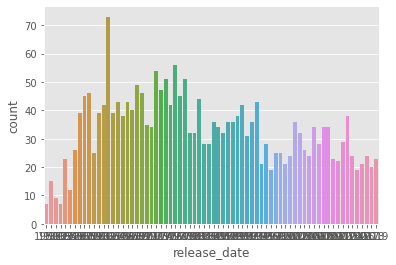

In [53]:
sns.countplot('release_date',data=df[df.topic == 'music'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

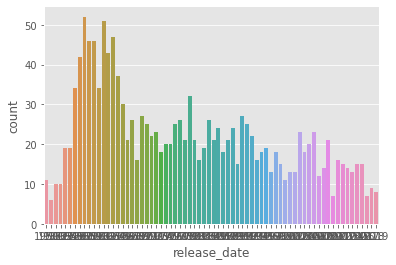

In [54]:
sns.countplot('release_date',data=df[df.topic == 'romantic'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

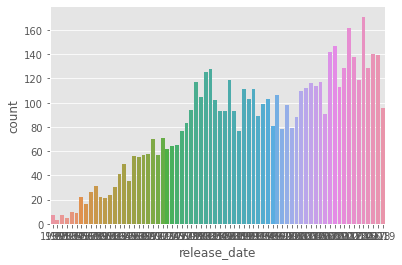

In [55]:
sns.countplot('release_date',data=df[df.topic == 'violence'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

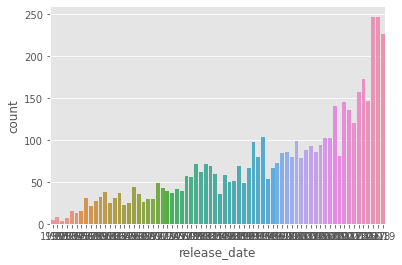

In [56]:
sns.countplot('release_date',data=df[df.topic == 'obscene'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

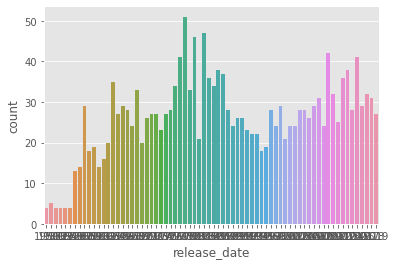

In [57]:
sns.countplot('release_date',data=df[df.topic == 'night/time'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

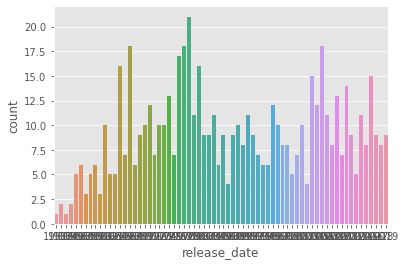

In [58]:
sns.countplot('release_date',data=df[df.topic == 'feelings'])

In [59]:
df['label1'] = 0
for index,row in df.iterrows():
    df.loc[(df['genre'] == 'pop'), 'label1'] = 0
    df.loc[(df['genre'] == 'country'), 'label1'] = 1
    df.loc[(df['genre'] == 'blues'), 'label1'] = 2
    df.loc[(df['genre'] == 'jazz'), 'label1'] = 3
    df.loc[(df['genre'] == 'reggae'), 'label1'] = 4
    df.loc[(df['genre'] == 'rock'), 'label1'] = 5
    df.loc[(df['genre'] == 'hip hop'), 'label1'] = 6

In [60]:
df['label2'] = 0
for index,row in df.iterrows():
    df.loc[(df['topic'] == 'sadness'), 'label2'] = 0
    df.loc[(df['topic'] == 'world/life'), 'label2'] = 1
    df.loc[(df['topic'] == 'music'), 'label2'] = 2
    df.loc[(df['topic'] == 'romantic'), 'label2'] = 3
    df.loc[(df['topic'] == 'violence'), 'label2'] = 4
    df.loc[(df['topic'] == 'obscene'), 'label2'] = 5
    df.loc[(df['topic'] == 'night/time'), 'label2'] = 6
    df.loc[(df['topic'] == 'feelings'), 'label2'] = 7

In [61]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=10)
data = df['lyrics']
features = vectorizer.fit_transform(data).toarray()
X = features
print(X.shape)

(28372, 23837)


In [62]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, df.label2, test_size = 0.2)

In [63]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

e:\nlp2\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9450123369756785
2837


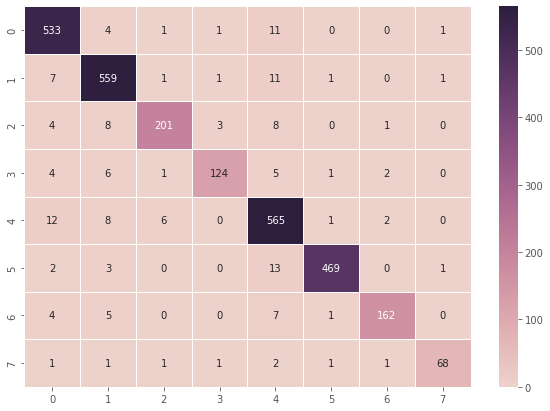

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), index = [0,1,2,3,4,5,6,7], columns = [0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.9499647639182522
2838


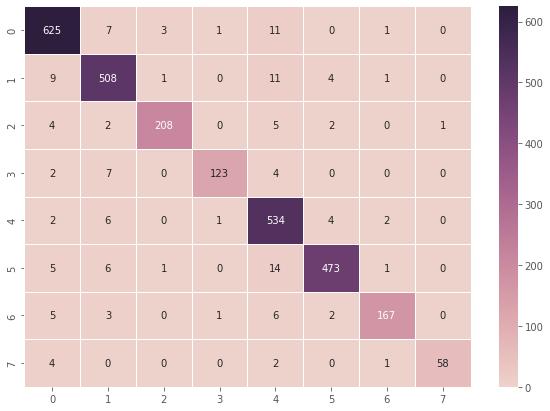

In [65]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), index = [0,1,2,3,4,5,6,7], columns = [0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.7204793796263659
2837


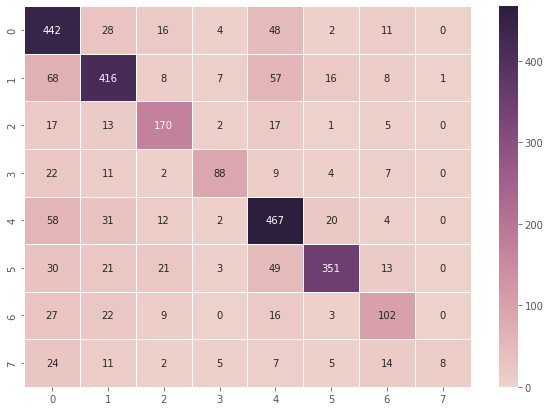

In [66]:
from sklearn.naive_bayes import BernoulliNB
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7307963354474982
2838


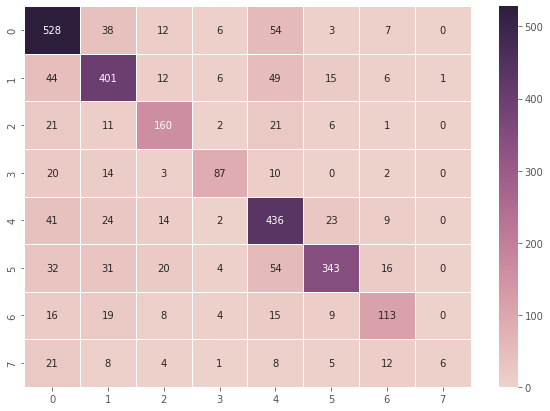

In [67]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7652449770884737
2837


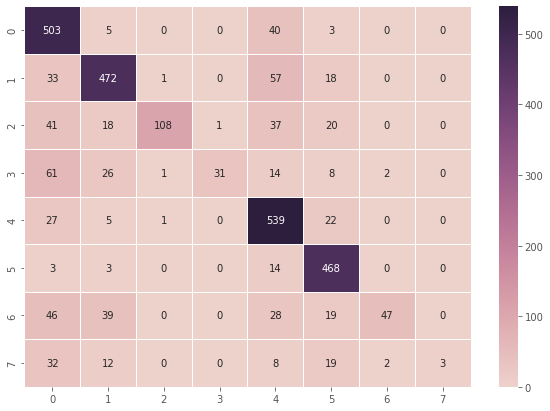

In [68]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7787174066243834
2838


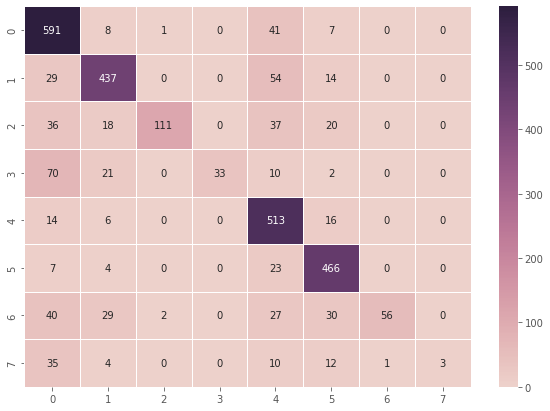

In [69]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9383151216073317
2837


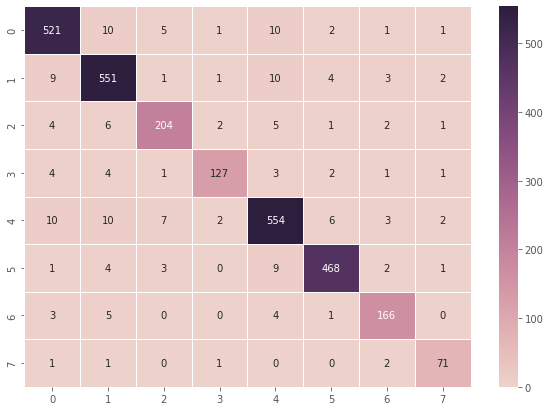

In [70]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9432699083861874
2838


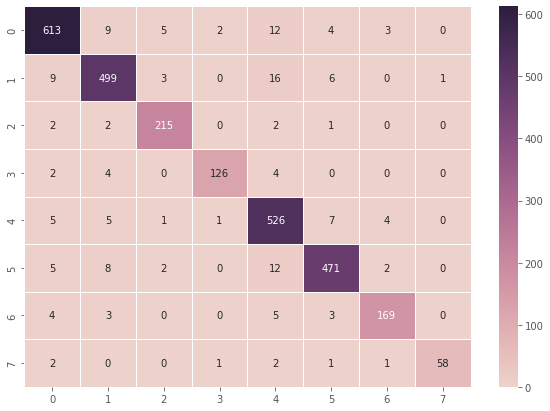

In [71]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [72]:
X = df['lyrics']
y = df['label2']
num_words = X.shape[0]
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X)
length = []
for i in sequences:
    length.append(len(i))
print(np.max(length))

199


In [73]:
X = pad_sequences (sequences, padding = 'post')

In [74]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [75]:
#model
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(LSTM(32, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(nr_labels, activation='sigmoid'))
    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 199, 32)           907904    
                                                                 
 lstm (LSTM)                 (None, 199, 32)           8320      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                        

In [76]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 10s 11ms/step - loss: 1.2415 - accuracy: 0.5202 - val_loss: 0.7046 - val_accuracy: 0.7466
Epoch 2/5
710/710 [==============================] - 7s 10ms/step - loss: 0.5267 - accuracy: 0.8157 - val_loss: 0.4956 - val_accuracy: 0.8276
Epoch 3/5
710/710 [==============================] - 7s 10ms/step - loss: 0.2850 - accuracy: 0.9097 - val_loss: 0.4381 - val_accuracy: 0.8597
Epoch 4/5
710/710 [==============================] - 7s 10ms/step - loss: 0.1483 - accuracy: 0.9541 - val_loss: 0.4283 - val_accuracy: 0.8742
Epoch 5/5
710/710 [==============================] - 7s 10ms/step - loss: 0.0926 - accuracy: 0.9740 - val_loss: 0.4441 - val_accuracy: 0.8784


In [77]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.88


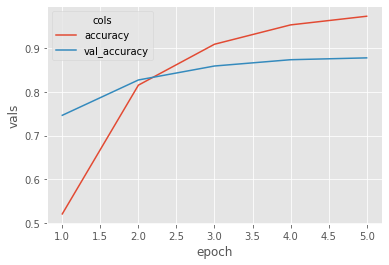

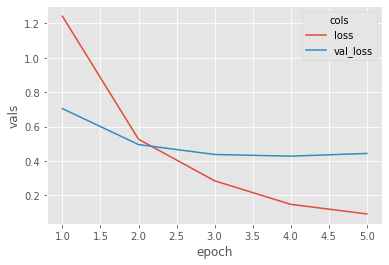

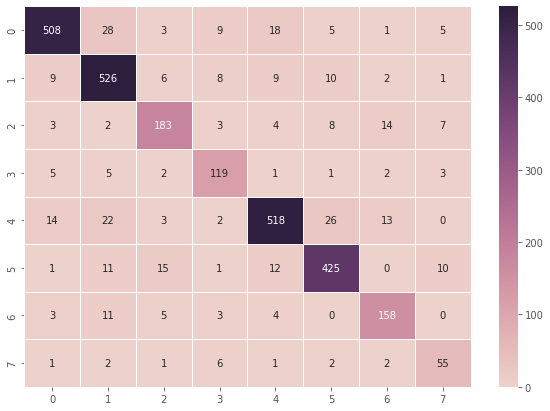

In [78]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [79]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.87


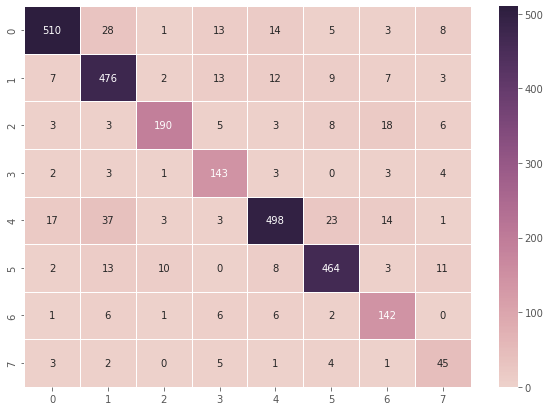

In [80]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [81]:
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(Conv1D(128, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 199, 32)           907904    
                                                                 
 conv1d (Conv1D)             (None, 195, 128)          20608     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 65, 128)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 65, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 256)           164096    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 256)          0         
 1D)                                                  

In [82]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=3, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/3
710/710 [==============================] - 8s 8ms/step - loss: 1.0260 - accuracy: 0.6237 - val_loss: 0.5575 - val_accuracy: 0.8065
Epoch 2/3
710/710 [==============================] - 5s 7ms/step - loss: 0.3513 - accuracy: 0.8840 - val_loss: 0.3549 - val_accuracy: 0.8851
Epoch 3/3
710/710 [==============================] - 5s 7ms/step - loss: 0.1538 - accuracy: 0.9515 - val_loss: 0.4513 - val_accuracy: 0.8759


In [83]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.88


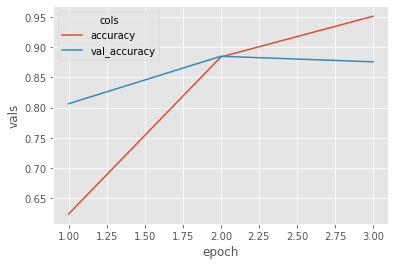

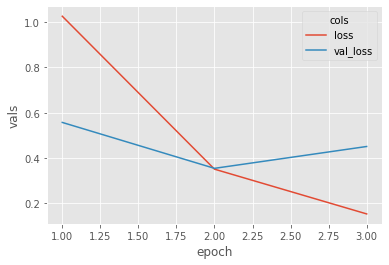

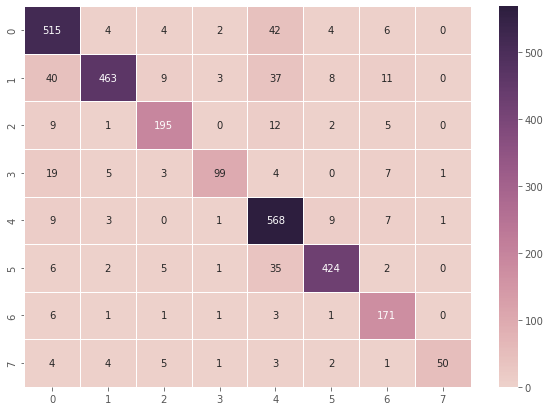

In [84]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [85]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.87


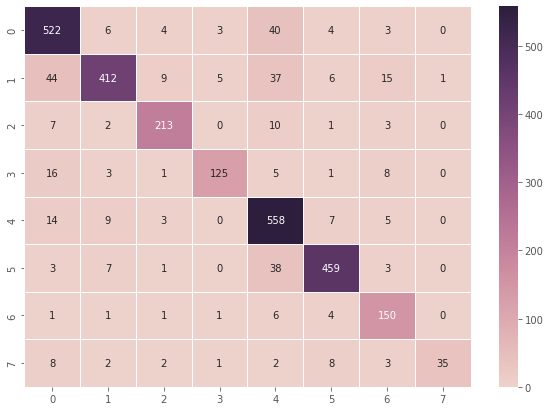

In [86]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [413]:
df2 = pd.DataFrame()
df2['lyrics'] = df['lyrics']
df2['label1'] = df['label1']
df2['label2'] = df['label2']

In [423]:
sound_features = []
for index,row in df.iterrows():
    row_features = []
    row_features.append(row['dating'])
    row_features.append(row['violence'])
    row_features.append(row['world/life'])
    row_features.append(row['night/time'])
    row_features.append(row['shake the audience'])
    row_features.append(row['family/gospel'])
    row_features.append(row['romantic'])
    row_features.append(row['communication'])
    row_features.append(row['obscene'])
    row_features.append(row['music'])
    row_features.append(row['movement/places'])
    row_features.append(row['light/visual perceptions'])
    row_features.append(row['family/spiritual'])
    row_features.append(row['like/girls'])
    row_features.append(row['sadness'])
    row_features.append(row['feelings'])
    
#     row_features.append(row['danceability'])
#     row_features.append(row['loudness'])
#     row_features.append(row['acousticness'])
#     row_features.append(row['instrumentalness'])
#     row_features.append(row['valence'])
#     row_features.append(row['energy'])
    
#     row_features.append(row['age'])
    
    sound_features.append(row_features)
df2['features'] = sound_features

In [425]:
X = df2['features']
y = df2['label2']


In [426]:
X = X.tolist()
y = y.tolist()

In [427]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [464]:
def build_model(nr_labels):
    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=(16,)))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 32)                544       
                                                                 
 dense_139 (Dense)           (None, 8)                 264       
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [465]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 3s 3ms/step - loss: 0.9192 - accuracy: 0.7614 - val_loss: 0.2532 - val_accuracy: 0.9743
Epoch 2/5
710/710 [==============================] - 2s 3ms/step - loss: 0.1349 - accuracy: 0.9863 - val_loss: 0.0857 - val_accuracy: 0.9922
Epoch 3/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9939 - val_loss: 0.0531 - val_accuracy: 0.9958
Epoch 4/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0433 - accuracy: 0.9956 - val_loss: 0.0408 - val_accuracy: 0.9947
Epoch 5/5
710/710 [==============================] - 2s 3ms/step - loss: 0.0345 - accuracy: 0.9963 - val_loss: 0.0335 - val_accuracy: 0.9968


In [466]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 1.00


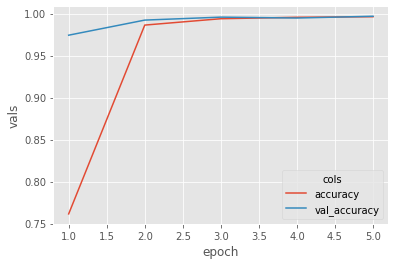

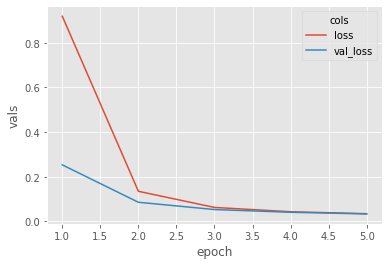

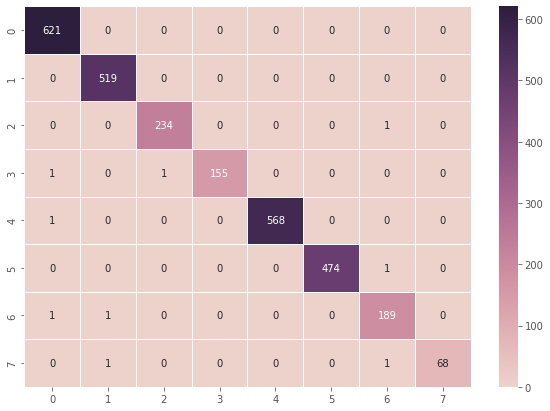

In [467]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [468]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 1.00


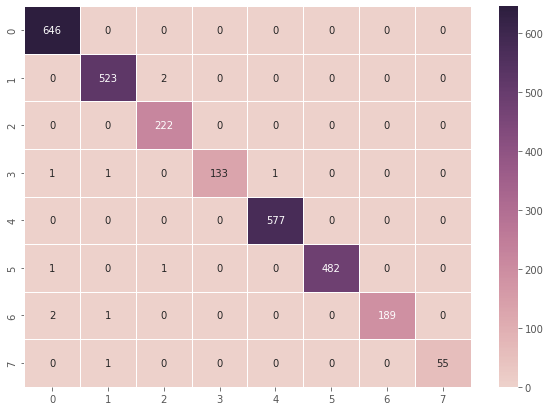

In [469]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()